In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Acquiring data

In [3]:
train = pd.read_csv('titanic_train-Copy1.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Discovering the data

## *Exploratory data analysis*

A lot of times you are going to have missing data.

We can use seaborn to make a simple heatmap to see where are we missing most of our data.

In [6]:
#there will be True values where NaN values are -- those are missing data
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

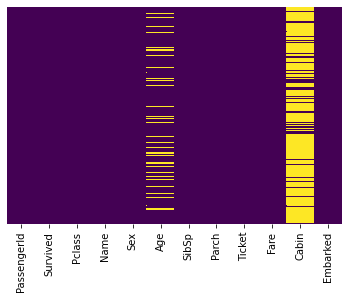

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Every yellow dash above represents a missing datapoint.

So, we're missing some age information, and a lot of cabin information.

If only a certain portion of the data is missing from a column, it is likely they can be filled in by their other corresponding columns.

In [8]:
sns.set_style('whitegrid')

Let's see how many people survived:

<AxesSubplot:xlabel='Survived', ylabel='count'>

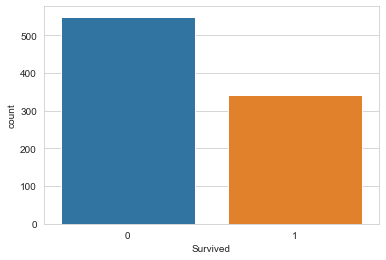

In [9]:
sns.countplot(x='Survived', data=train)

Let's see now the survivors by gender:

<AxesSubplot:xlabel='Survived', ylabel='count'>

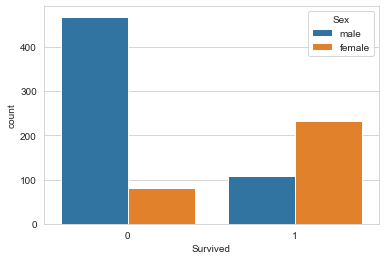

In [10]:
sns.countplot(x='Survived', data=train, hue='Sex')

Let's see the survivors by ticket class:

<AxesSubplot:xlabel='Survived', ylabel='count'>

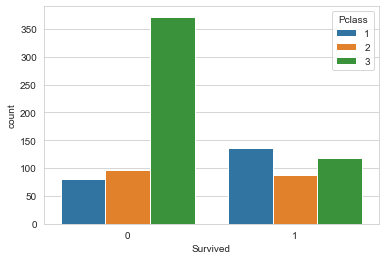

In [11]:
sns.countplot(x='Survived', data=train, hue='Pclass')

Let's see the passengers' age on the Titanic:

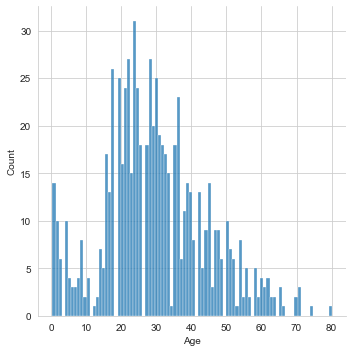

In [12]:
sns.displot(x='Age', data=train, bins=90)

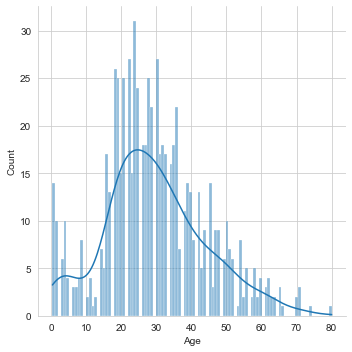

In [13]:
sns.displot(train['Age'].dropna(), kde=True, bins=100)

Let's see the number of siblings and spouses passengers had on board:

<AxesSubplot:xlabel='SibSp', ylabel='count'>

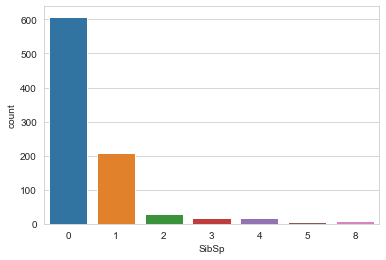

In [14]:
sns.countplot(x='SibSp', data=train)

Let's also see how much people paid for the fare:

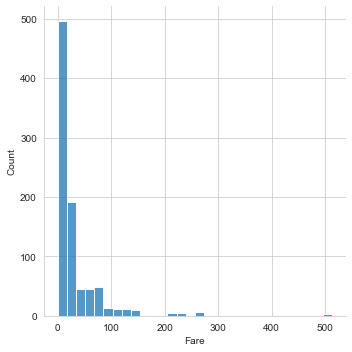

In [15]:
sns.displot(x='Fare', data=train, bins=30)

...Or...

In [16]:
import cufflinks as cf
cf.go_offline()

train['Fare'].iplot(kind='hist', bins=40)

# Transforming / Cleaning data
## _Dealing with missing values_

We have a lot of missing Age data rows, and we want to fill them instead of dropping all such rows.

One way to do this is to fill in the _mean_ age of all teh passengers.

<AxesSubplot:>

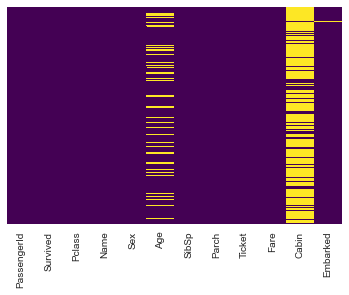

In [17]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In statistics, _imputation_ is the process of replacing missing data with substituted values.

We could just fill in the average age for each missing value.
However, we can be one step smarter and check the average age by passenger class.

In [18]:
train.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

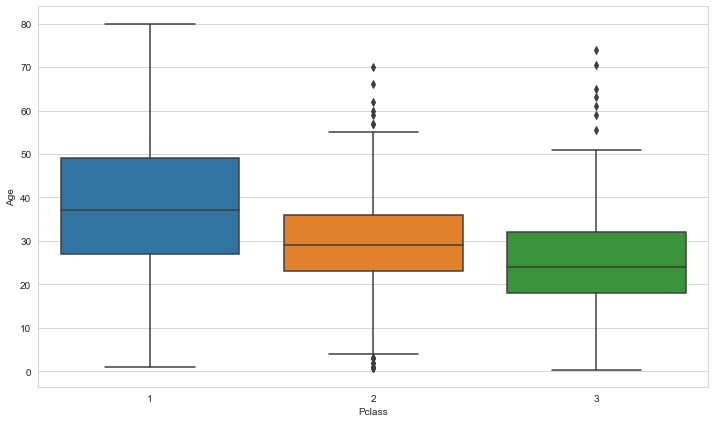

In [19]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    first_class_mean = train.groupby('Pclass').mean()['Age'].iloc[0]
    second_class_mean = train.groupby('Pclass').mean()['Age'].iloc[1]
    third_class_mean = train.groupby('Pclass').mean()['Age'].iloc[2]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return first_class_mean
        elif Pclass == 2:
            return second_class_mean
        else:
            return third_class_mean
    else:
        return Age

In [21]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1) #axis=1 is important so that this applies to the columns!!!

<AxesSubplot:>

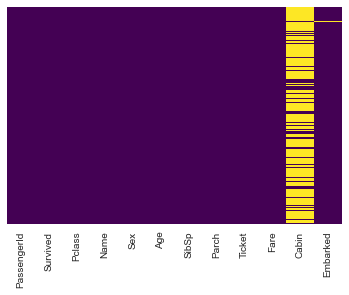

In [22]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Since there are so many missing cabin columns, we can even drop the whole column altogether.

In [23]:
train.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

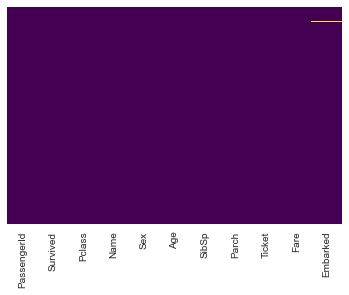

In [24]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Drop any more missing values.

In [25]:
train.dropna(inplace=True)

<AxesSubplot:>

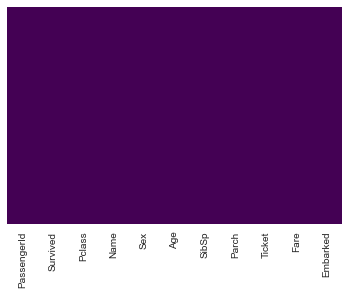

In [26]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## _Dealing with categorical features_
We need to convert categorical features into _**dummy (a.k.a. indicator) variables**_ in order for the model to be able to work with them numerically. (E.g.: "male" or "female" will be either 0 or 1; the city initial letters instead of "C" or "S" will be 0 and 1.)

In [27]:
pd.get_dummies(train["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


The problem now with the dataframe above is that since we have 2 columns for each category of gender, each having either 0 or 1 as value, **one column is perfect predictor of the other**, since one mutually excludes the other. This is called multicollinearity, and it can really mess up learner models. [(wiki page)](https://en.wikipedia.org/wiki/Multicollinearity)
>In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. In this situation, the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. That is, a multivariate regression model with collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.

In order to avoid this we provide the following argument to the function as well: `drop_first=True`

In [28]:
pd.get_dummies(train["Sex"], drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [29]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


We want the same processing for the Embarked column.

In [30]:
embarked = pd.get_dummies(train['Embarked'])
embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [31]:
embarked = pd.get_dummies(train['Embarked'], drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


Now we want to add these new columns to our dataframe.

In [32]:
train = pd.concat([train, sex, embarked], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


The last 3 columns above are called **indicators** or **dummies**.

## _Filter for relevant data_

Now we drop all the columns that we cannot use in our prediction model.

In [33]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [34]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.00000,1,0,7.2500,1,0,1
1,2,1,1,38.00000,1,0,71.2833,0,0,0
2,3,1,3,26.00000,0,0,7.9250,0,0,1
3,4,1,1,35.00000,1,0,53.1000,0,0,1
4,5,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.00000,0,0,13.0000,1,0,1
887,888,1,1,19.00000,0,0,30.0000,0,0,1
888,889,0,3,25.14062,1,2,23.4500,0,0,1
889,890,1,1,26.00000,0,0,30.0000,1,0,0


Notice that the PassengerId is not useful either, since the dataframe is indexed already. This means we can get rid of it as well, it will not be a predictor anyway.

In [35]:
train.drop(['PassengerId'], axis=1, inplace=True)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.00000,1,0,7.2500,1,0,1
1,1,1,38.00000,1,0,71.2833,0,0,0
2,1,3,26.00000,0,0,7.9250,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1
4,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,1,0,1
887,1,1,19.00000,0,0,30.0000,0,0,1
888,0,3,25.14062,1,2,23.4500,0,0,1
889,1,1,26.00000,0,0,30.0000,1,0,0


# The model
## _Create and train model_
We have a train.csv and a test.csv file for this project, but let's treat the train.csv as if it was all our data available, so we will split it into train and test sets.

First we separate our data into an X and y matrix and vector:
* X is the features
* y is the variable we want to predict (the actual label)

In [36]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel = LogisticRegression()

In [41]:
logmodel.fit(X_train, y_train)

C:\Users\fazek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

The issue above was solved by [this stack overflow post](https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter).
>If the error of solving is ranging within very small range (i.e. it is almost not changing), then that means the algorithm reached the solution *(not necessary to be the best solution as it might be stuck at what so-called "Local Optima")*. On the other hand, if the error is **varying noticeably** (even if the error is relatively small but rather the differences between the errors per iteration is greater than some tolerance) then we say the algorithm did not converge.<br />
However, note that increasing the maximum number of iterations does not necessarily guarantee convergence.

The solution for this particular problem can be to increase the iteration of the solver algorithm.

Also, some tips to try (out of many) that might help the algorithm to converge are:

* Increase the Number of Iterations
* Try Different Optimizer
* Scale Your Data
* Add Engineered Features
* Data Pre-processing
* Add More Data

In [42]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=300)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [43]:
predictions = logmodel.predict(X_test)

## _Evaluate the model_
Confusion matrices and precision-recall-F1 score are a good way to see how a logistic regression model perform.

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 31,  73]], dtype=int64)

Or using seaborn:

<AxesSubplot:>

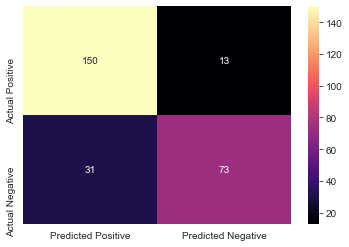

In [46]:
conf_matrix = confusion_matrix(y_test, predictions)

cm = pd.DataFrame(conf_matrix, index=['Actual Positive', 'Actual Negative'], columns=['Predicted Positive', 'Predicted Negative'])

sns.heatmap(cm, annot=True, fmt='d', cmap='magma')

---
# Take 2

In [47]:
df = pd.read_csv('titanic_train-Copy1.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

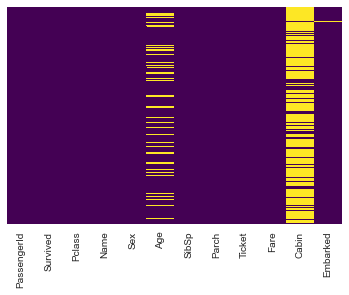

In [48]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [49]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## _Cleaning and imputing_

In [50]:
df.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

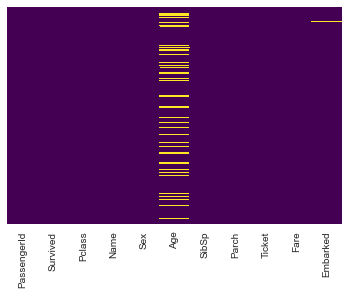

In [52]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [53]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

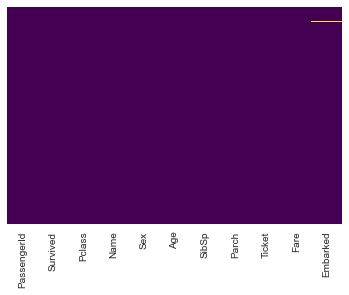

In [54]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [55]:
df.dropna(inplace=True)

<AxesSubplot:>

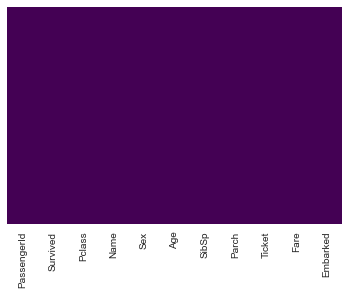

In [56]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## _Processing categorical features_

In [59]:
gender = pd.get_dummies(df['Sex'], drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [61]:
embarked = pd.get_dummies(df['Embarked'], drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


### _Let's create a categorical feature from the titles of passengers (Mr., Mrs., Miss, etc.)_

In [152]:
def leave_only_title(name):
    if 'Mr.' in name[0]: return 'Mr.'
    elif 'Miss.' in name[0]: return 'Miss'
    elif 'Mrs.' in name[0]: return 'Mrs.'
    else: return np.nan

#this is a freaking Series.apply call!
#df['Name'].apply(leave_only_title, axis=1)

titles = pd.DataFrame(df['Name']).apply(leave_only_title, axis=1).to_frame('Title')
titles

,Title
0,Mr.
1,Mrs.
2,Miss
3,Mrs.
4,Mr.
...,...
886,NaN
887,Miss
888,Miss
889,Mr.


Checking how many titles were not covered after accounting for 'Mr.', 'Miss' and 'Mrs.':

**67**

In [156]:
titles[titles['Title'].isnull()]

,Title
7,NaN
16,NaN
30,NaN
50,NaN
59,NaN
...,...
831,NaN
848,NaN
850,NaN
869,NaN


In [158]:
df['Name'][7]

'Palsson, Master. Gosta Leonard'

Looks like there were gentlemen on board with the title _'Master'_.

### _Take Masters into consideration_

In [161]:
def leave_only_title(name):
    if 'Mr.' in name[0]: return 'Mr.'
    elif 'Miss.' in name[0]: return 'Miss'
    elif 'Mrs.' in name[0]: return 'Mrs.'
    elif 'Master' in name[0]: return 'Master'
    else: return np.nan

titles = pd.DataFrame(df['Name']).apply(leave_only_title, axis=1).to_frame('Title')

titles[titles['Title'].isnull()].shape[0]

27

**27 other titles to go.**

In [162]:
titles[titles['Title'].isnull()]

,Title
30,NaN
149,NaN
150,NaN
245,NaN
249,NaN
317,NaN
369,NaN
398,NaN
443,NaN
449,NaN


In [164]:
df['Name'][30]

'Uruchurtu, Don. Manuel E'

The _Dons_... Of course.

### _Account for the Dons_

In [165]:
def leave_only_title(name):
    if 'Mr.' in name[0]: return 'Mr.'
    elif 'Miss.' in name[0]: return 'Miss'
    elif 'Mrs.' in name[0]: return 'Mrs.'
    elif 'Master' in name[0]: return 'Master'
    elif 'Don.' in name[0]: return 'Don'
    else: return np.nan

titles = pd.DataFrame(df['Name']).apply(leave_only_title, axis=1).to_frame('Title')

titles[titles['Title'].isnull()].shape[0]

26

**26** unknown titles after the previous 27. So basically we've found the only one _'Don'_.

Let's continue checking the other unknown titles. Rinse and repeat, but speed this notebook up a bit.

In [170]:
df['Name'][150]

'Bateman, Rev. Robert James'

In [171]:
df['Name'][245]

'Minahan, Dr. William Edward'

In [174]:
df['Name'][369]

'Aubart, Mme. Leontine Pauline'

In [176]:
df['Name'][443]

'Reynaldo, Ms. Encarnacion'

In [177]:
df['Name'][449]

'Peuchen, Major. Arthur Godfrey'

In [180]:
df['Name'][556]

'Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")'

In [181]:
df['Name'][599]

'Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")'

In [184]:
df['Name'][641]

'Sagesser, Mlle. Emma'

In [185]:
df['Name'][647]

'Simonius-Blumer, Col. Oberst Alfons'

In [189]:
df['Name'][745]

'Crosby, Capt. Edward Gifford'

In [191]:
df['Name'][759]

'Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)'

In [195]:
df['Name'][822]

'Reuchlin, Jonkheer. John George'

We instantly get to know a few information:
* There were a couple of priests and doctors on board, as well as people with noble origins (English, French, even one Dutch (a squire)), more than one Major and more than one Colonel. -- **We can introduce a _HighSocietyRank_ feature, maybe it doesn't cause the model to overfit.**
* There were Mademoiselles, but can they be treated as Misses? -- Imho no, because the fact that they were French must be of importance. We shouldn't want to get rid of **_subtext information_** from the data. (How effectively a French lady or gentleman would get help on board of a British ship? Given that they were minority among English people, how did they react then and, how would others helped them?)
* We have one captain on this list. He probably was the Titanic's captain, but that is not taken for granted in the dataset of course.

I'm wondering how many of these _not-ordinary_ people were among the passengers, and how many of them survived, given their ranks and professions.

So, in order to further examine the data, let's finish the processing of this new categorical feature.

In [199]:
def leave_only_title(name):
    if 'Mr.' in name[0]: return 'Mr'
    elif 'Miss.' in name[0]: return 'Miss'
    elif 'Mrs.' in name[0]: return 'Mrs'
    elif 'Master' in name[0]: return 'Master'
    elif 'Don.' in name[0]: return 'Don'
    elif 'Rev.' in name[0]: return 'Reverend'
    elif 'Dr.' in name[0]: return 'Doctor'
    elif 'Mme.' in name[0]: return 'Madame'
    elif 'Ms.' in name[0]: return 'Miss' #I didn't find a reason to distinguish between Ms. and Miss. in the 19th century, and Ms. became an alternative for Miss. in the 20th century.
    elif 'Major.' in name[0]: return 'Major'
    elif 'Lady.' in name[0]: return 'Lady'
    elif 'Sir.' in name[0]: return 'Sir'
    elif 'Mlle.' in name[0]: return 'Mademoiselle'
    elif 'Col.' in name[0]: return 'Colonel'
    elif 'Capt.' in name[0]: return 'Captain'
    elif 'Countess.' in name[0]: return 'Countess'
    elif 'Jonkheer.' in name[0]: return 'Jonkheer'
    else: return np.nan

titles = pd.DataFrame(df['Name']).apply(leave_only_title, axis=1).to_frame('Title')

print('titles not processed: ', titles[titles['Title'].isnull()].shape[0])

titles not processed:  0


In [203]:
titles.drop_duplicates()

,Title
0,Mr
1,Mrs
2,Miss
7,Master
30,Don
149,Reverend
245,Doctor
369,Madame
449,Major
556,Lady


Let's create a new dataframe for the indicator of the title feature for the model, and combine this to the dataset for more exploratory data analysis. 

In [205]:
titles_indicator = pd.get_dummies(titles, drop_first=True)
titles_indicator

,Title_Colonel,Title_Countess,Title_Doctor,Title_Don,Title_Jonkheer,Title_Lady,Title_Madame,Title_Mademoiselle,Title_Major,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Reverend,Title_Sir
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
887,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## _Concatenate categorical indicator features to the dataset_

In [238]:
df_for_model = pd.concat([df, gender, embarked, titles_indicator], axis=1)
df_for_model.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Lady,Title_Madame,Title_Mademoiselle,Title_Major,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Reverend,Title_Sir
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,1,0,0,0


## _Filter for relevant data_

In [239]:
df_for_model.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
df_for_model

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,...,Title_Lady,Title_Madame,Title_Mademoiselle,Title_Major,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Reverend,Title_Sir
0,1,0,3,22.00000,1,0,7.2500,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,38.00000,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.00000,0,0,7.9250,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,1,1,35.00000,1,0,53.1000,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,5,0,3,35.00000,0,0,8.0500,1,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.00000,0,0,13.0000,1,0,1,...,0,0,0,0,0,0,0,0,1,0
887,888,1,1,19.00000,0,0,30.0000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
888,889,0,3,25.14062,1,2,23.4500,0,0,1,...,0,0,0,0,0,1,0,0,0,0
889,890,1,1,26.00000,0,0,30.0000,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [240]:
df_for_model.drop(['PassengerId'], axis=1, inplace=True)
df_for_model.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Title_Colonel,...,Title_Lady,Title_Madame,Title_Mademoiselle,Title_Major,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Reverend,Title_Sir
0,0,3,22.0,1,0,7.2500,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


# The model #2

## _Create and train the model_

In [241]:
X = df_for_model.drop('Survived', axis=1)
y = df_for_model['Survived']

In [242]:
from sklearn.model_selection import train_test_split

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [244]:
from sklearn.linear_model import LogisticRegression

In [248]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [249]:
predictions = logmodel.predict(X_test)

## _Evaluate the model_

In [250]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       163
           1       0.87      0.73      0.80       104

    accuracy                           0.85       267
   macro avg       0.86      0.83      0.84       267
weighted avg       0.86      0.85      0.85       267



In [213]:
#previous metrics without having the titles as features:

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [251]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[152,  11],
       [ 28,  76]], dtype=int64)

In [214]:
#previous confusion matrix:

array([[150,  13],
       [ 31,  73]], dtype=int64)

<AxesSubplot:>

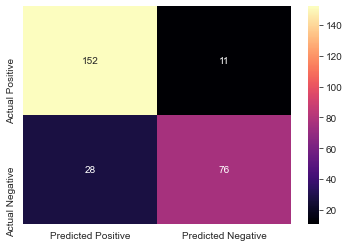

In [252]:
conf_matrix = confusion_matrix(y_test, predictions)

cm = pd.DataFrame(conf_matrix, index=['Actual Positive', 'Actual Negative'], columns=['Predicted Positive', 'Predicted Negative'])

sns.heatmap(cm, annot=True, fmt='d', cmap='magma')

<AxesSubplot:>

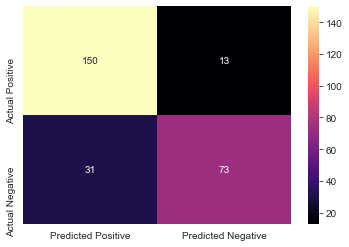

In [216]:
#heatmap of previous confusion matrix: